<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#check-gap" data-toc-modified-id="check-gap-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>check gap</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


### Откройте файл с данными и изучите общую информацию. 

**1** Загрузим библиотеки для работы

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

**2** Считаем исходный файл

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

**3** Просмотрим исходную таблицу для планирования дальнейших действий.

In [3]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**4** Таблица не входит полностью, ознакомимся с ее инфо.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** В таблице присутствуют странные и тяжело читаемые названия столбцов, имеются пропуски значений, ошибки в значениях и типах данных. Это все что попалось на первый взгляд и потребует дальнейших исправлений. 

Что потребуется сделать:
- Перемеиновать столбцы для лучшей читаемости;
- Проверить адекватность значений в каждом столбцах, которые вызывают сомнения и исправить их;
- Проверить данные на пропуски и дубли, и если понадобится избавиться от них;
- Проверить столбцы на корректность типов данных и исправить ошибки.

**5** Построим общую гистограмму для всех столбцов таблицы.

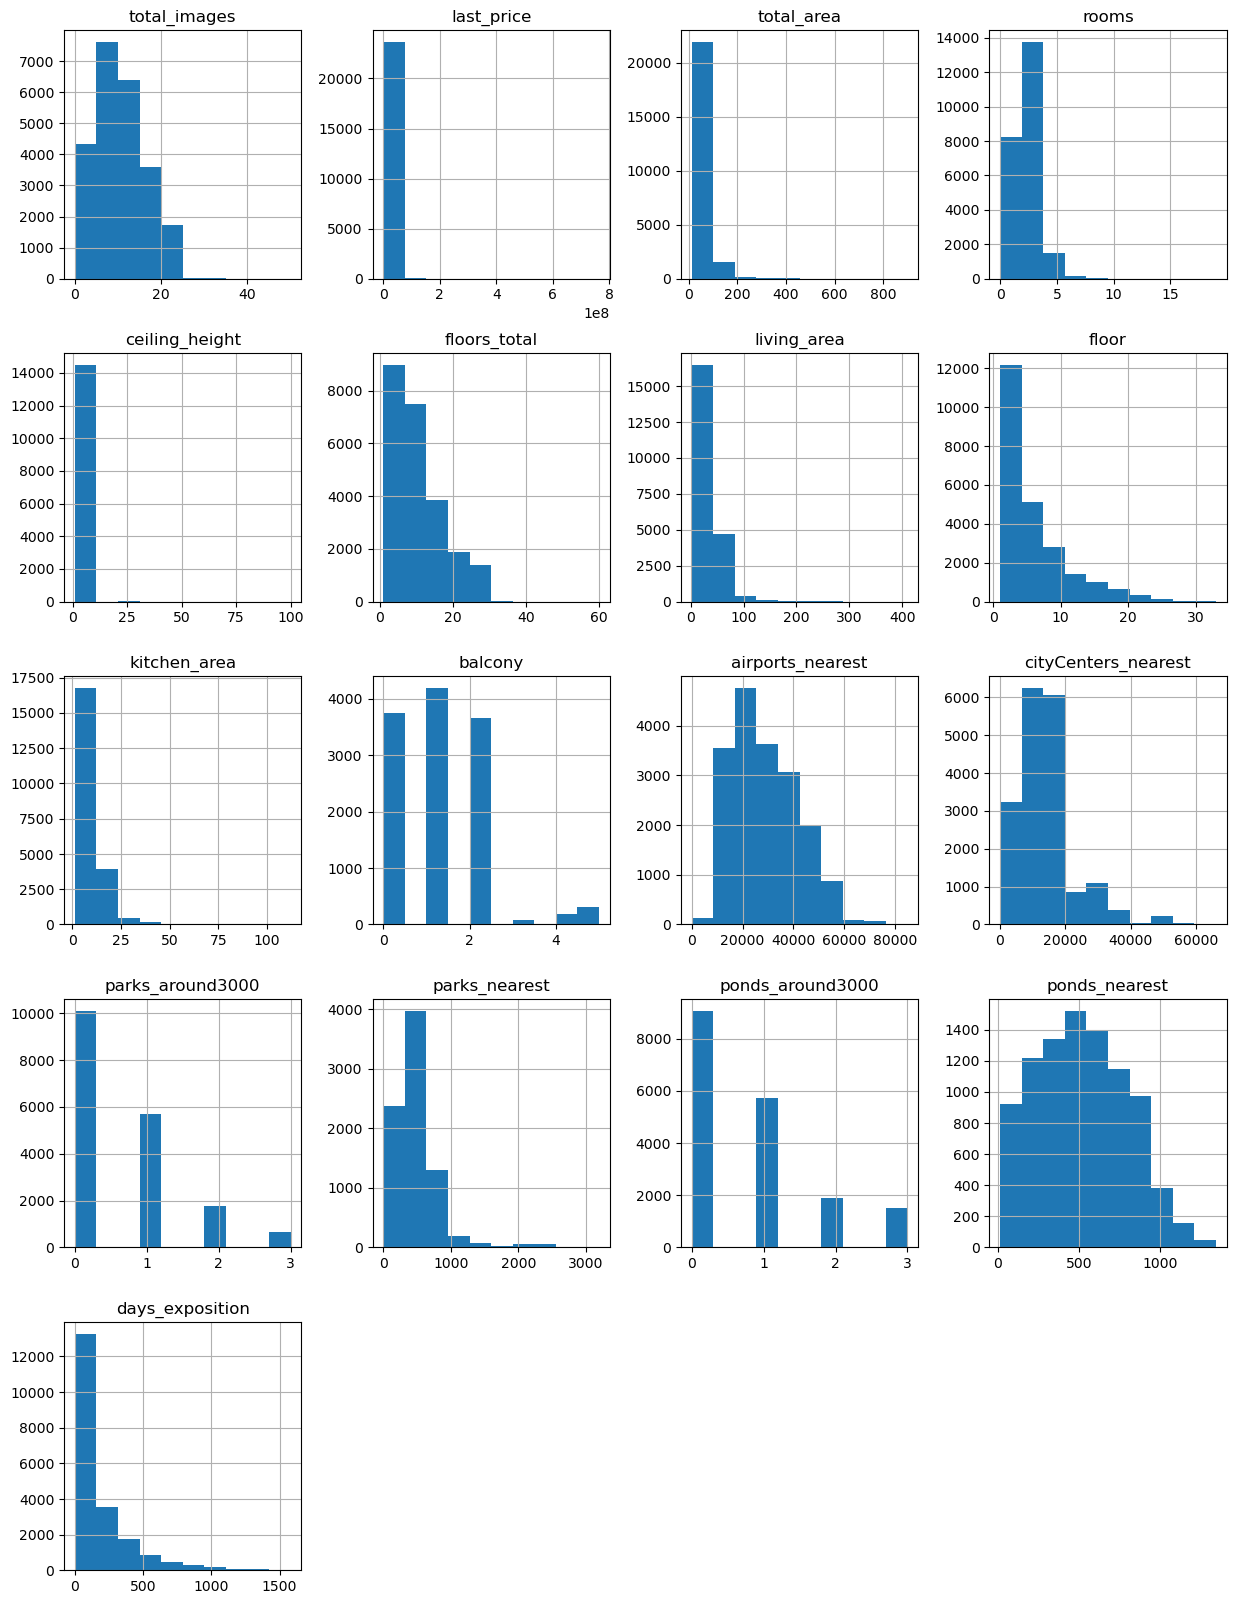

In [5]:
 data.hist(figsize=(15, 20));

### Предобработка данных

**1** Для начала исправим названия столбцов, сделав их более читаемыми и самое главное более ассоциативными. Также в будущем это позволит пресечь ошибки еще в зачатке. Для этого выведем названия столбцов, найдем странности и исправим их.

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Итак мы имеем несколько столбцов, в которых имеются лишние символы, отсутствующие пробелы и нарушение регистра. Исправим это.

In [7]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around', 'ponds_around3000':'ponds_around'})

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

Ошибки исправлены.

**2** Уже в шапке таблицы мы можем заметить, что некоторые столбцы, которые должны иметь определенно конкретные значения, имеют очевидные ошибки. Это дает предположить, что подобное встречается по всей таблице. Данные ошибки имеют абсурдные значения, поэтому считаю их нужно исправить еще до начала всей работы. В данном случае нужно проверить данные отвечающие за параметры самой недвижимости, так как некоторые числа не могут иметь показателей ниже определенного предела в принципе. Привлекают внимания такие столбцы как: комнаты, количество этажей, этаж и балконы.

In [9]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [10]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [11]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31],
      dtype=int64)

In [12]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Нашлись нулевые значения в столбцах комнат и балконов. В первом случае это определенно очевидная ошибка, с которой нужно поработать, а во втором нулевое значение может означать банальное отсутствие. Проверим сколько нулевых случаев в сумме.

In [13]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Нулевых значений - 197. От общей выборки это составляет 0,83%, что является незначительной суммой. По идее эти данные можно отбросить и заменить значения комнат на минимум, то есть 1. Не получится создать разлет количества комнат исходя из площади - это может дать ошибочные результаты. В данном случае мы сможем учесть некоторое количество однокомнатных помещений, если таковы включены в сумму нулевых значений. 

In [14]:
data.loc[(data['rooms'] == 0), 'rooms'] = 1

In [15]:
data['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Нулевое значение количество комнат исправлено.

**3** Сейчас нужно исправить пропуски значений в таблице. Проверим сколько пропусков имеется в сумме.

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around             5518
parks_nearest           15620
ponds_around             5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выявленные пропуски в таблице:

- ceiling_height (высота потолков);
- floors_total (количество этажей в доме) - **пропуски данного столбца составляют менее 1% и несут конкретную информацию до доме. В доме не может быть 0 этажей, но и точное число нам неизвестно. Так как процент пропуском составляет всего около 0,32%, я допускаю возможность привести пропущенные значения к медиане**;
- living_area (жилая площадь в квадратных метрах (м²));
- is_apartment (апартаменты (булев тип));
- kitchen_area (площадь кухни в квадратных метрах (м²));
- balcony (число балконов);
- locality_name (название населённого пункта) - **пропуски данного столбца можно отбросить, так как нам неизвестно реальные координаты данного дома, возможно это ошибка, так как очень глупо не указывать местоположение дома для объявления**;
- airports_nearest (расстояние до ближайшего аэропорта в метрах (м));
- city_centers_nearest (расстояние до центра города (м));
- parks_around (число парков в радиусе 3 км) - **пропуски данного столбца можно отбросит, так как парки могут как быть, так и не быть в принципе**;
- parks_nearest (расстояние до ближайшего парка (м));
- ponds_around (число водоёмов в радиусе 3 км) - **пропуски данного столбца можно отбросит, так как водоемы могут как быть, так и не быть в принципе**;
- ponds_nearest (расстояние до ближайшего водоёма (м));
- days_exposition (сколько дней было размещено объявление (от публикации до снятия))

In [17]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

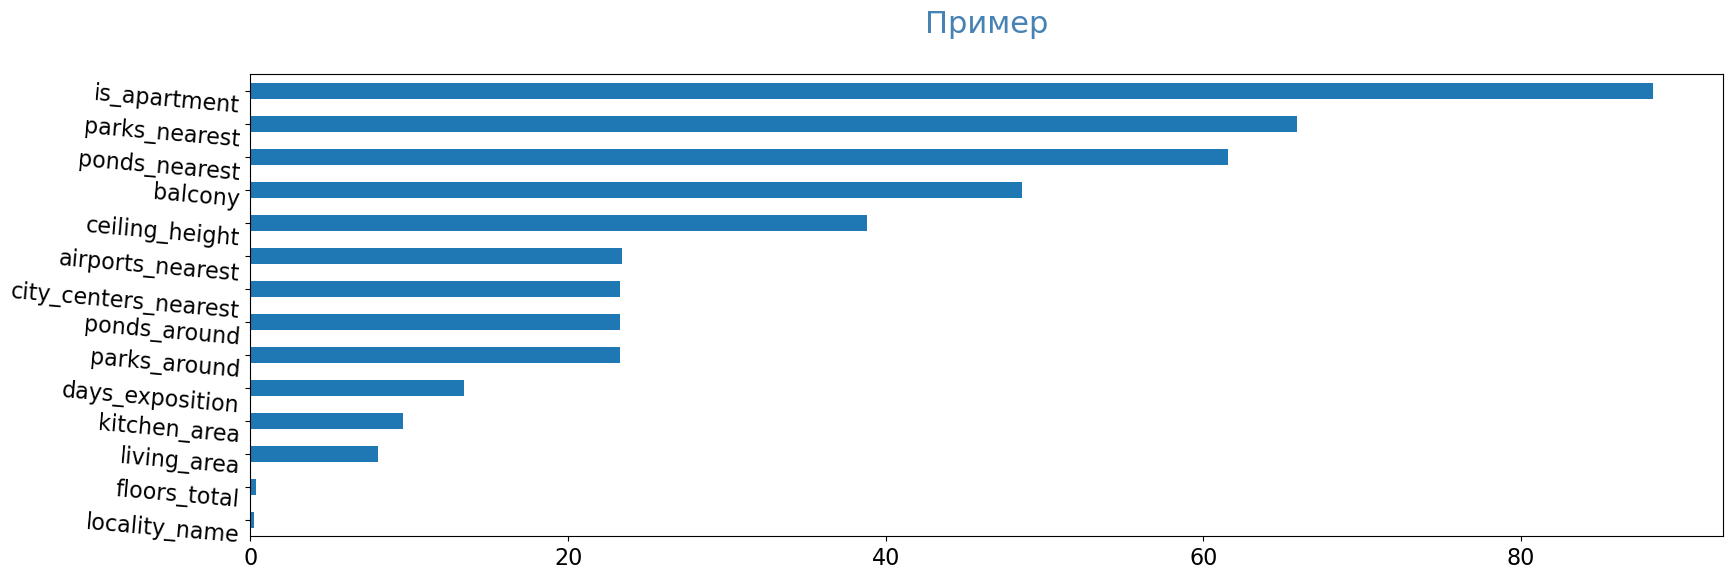

In [18]:
pass_value_barh(data)

Заполним пропуски в данных соответственно их типу. Для конкретных значений мы внесем следующие изменения.

In [19]:
replacing_values = []
for i in data:
    data['balcony'] = data['balcony'].fillna(0)
    data['parks_around'] = data['parks_around'].fillna(0)
    data['ponds_around'] = data['ponds_around'].fillna(0)

Приведем остальные столбцы к медианному значению:

In [20]:
median_type = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_type)
median_type = data['parks_nearest'].median()
data['parks_nearest'] = data['parks_nearest'].fillna(median_type)
median_type = data['ponds_nearest'].median()
data['ponds_nearest'] = data['ponds_nearest'].fillna(median_type)
median_type = data['days_exposition'].median()

In [21]:
# check
data[data['total_area']*0.9 <= (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,NaN,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,455.0,0.0,502.0,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,NaN,...,6.2,0.0,Санкт-Петербург,13952.0,15031.0,0.0,455.0,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,NaN,...,9.0,0.0,Санкт-Петербург,25408.0,16166.0,0.0,455.0,0.0,502.0,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,NaN,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,455.0,0.0,502.0,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,2.65,5.0,90.2,4,NaN,...,16.0,0.0,Санкт-Петербург,26259.0,4961.0,0.0,455.0,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.65,5.0,42.2,2,NaN,...,6.0,1.0,Высоцк,NaN,NaN,0.0,455.0,0.0,502.0,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.65,14.0,40.0,8,NaN,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,455.0,0.0,502.0,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4.0,44.0,2,NaN,...,15.3,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,502.0,NaN


In [22]:
family_status_debt = (data[['locality_name','city_centers_nearest',]].groupby(['locality_name']).count())
family_status_debt.head(50)

,city_centers_nearest
locality_name,
Бокситогорск,0
Волосово,0
Волхов,0
Всеволожск,0
Выборг,0
Высоцк,0
Гатчина,0
Зеленогорск,24
Ивангород,0


In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around                0
parks_nearest               0
ponds_around                0
ponds_nearest               0
days_exposition          3181
dtype: int64

Пропуски в таблице исправлены. Пропуски в названиях мы уберем позже.

**4** Исправим ошибки в типах данных стобцов.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype('int64')


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**5** Займемся поиском дубликатов значений в таблице. Единственная колонка, которая намекает на наличие дубликатов - это адреса.

In [27]:
len(data['locality_name'].unique())

365

In [28]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В основном во всем списке присутствуют разбросы в регистре и повторения связанные с буквами ё и е. Эти факторы могут нести в себе причины повторений. 

In [29]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name']

0            санкт-петербург
1             посёлок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23699, dtype: object

In [30]:
len(data['locality_name'].unique())

365

In [31]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True) 
data['locality_name']

0            санкт-петербург
1             поселок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23699, dtype: object

Уберем из столбца пропуски.

In [32]:
data['locality_name'].isna().sum()

49

In [33]:
data = data.dropna(subset=['locality_name'])

In [34]:
data['locality_name'].isna().sum()

0

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Дубликаты и пропуски удалены из таблицы.

In [36]:
# check
data.locality_name.nunique()

330

In [37]:
data.duplicated().sum()

0

#### check gap

Проверим какие аномалии остались

In [38]:
(
        data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
              'floor', 'floors_total']]
        .apply (['count', 'min', 'max', 'median'])   
        .style.format("{:,.2f}")
    )

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,650.00","23,650.00","23,650.00","20,470.00","23,650.00","21,752.00","21,381.00","23,650.00","23,565.00"
min,1.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00


In [39]:
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total)
    else 'другой'), axis=1

)

In [40]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [41]:
try:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [42]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


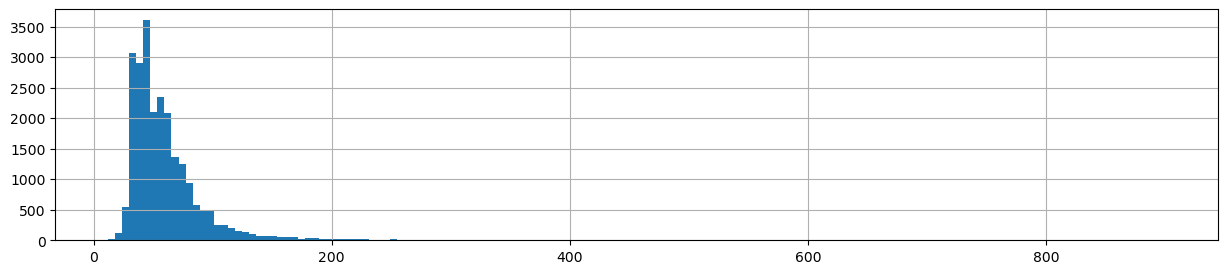

In [43]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

Все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями.

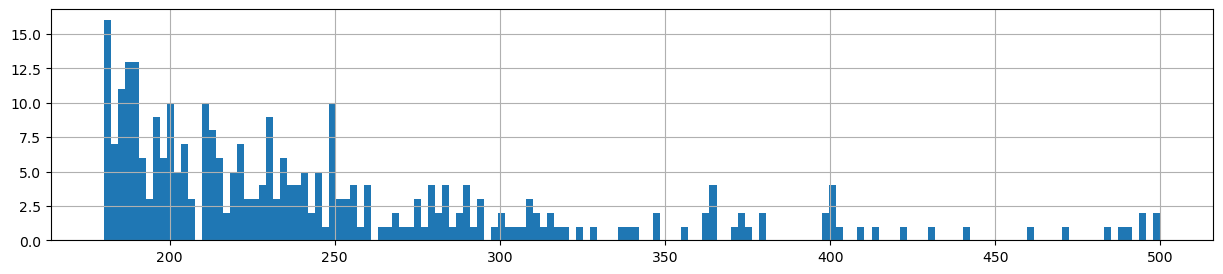

In [44]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

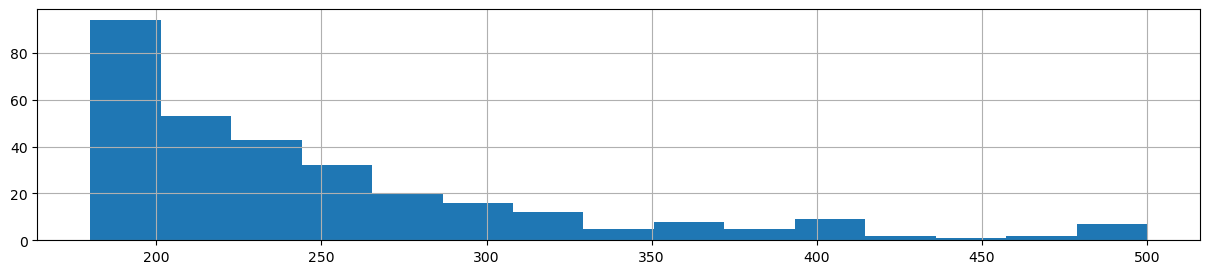

In [45]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

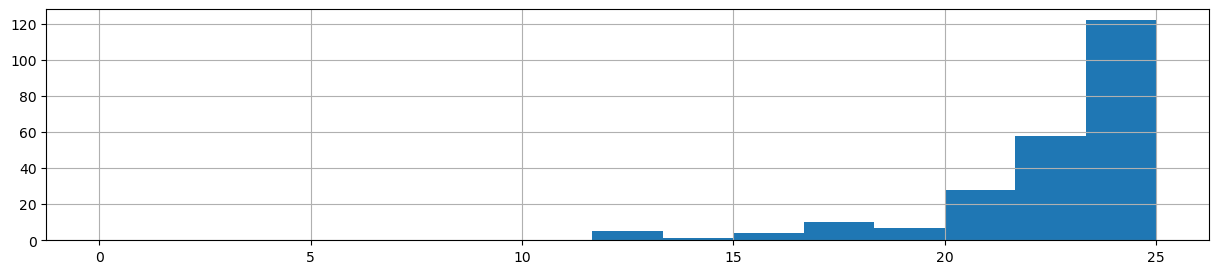

In [46]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

Проработаем хвосты

**rooms**

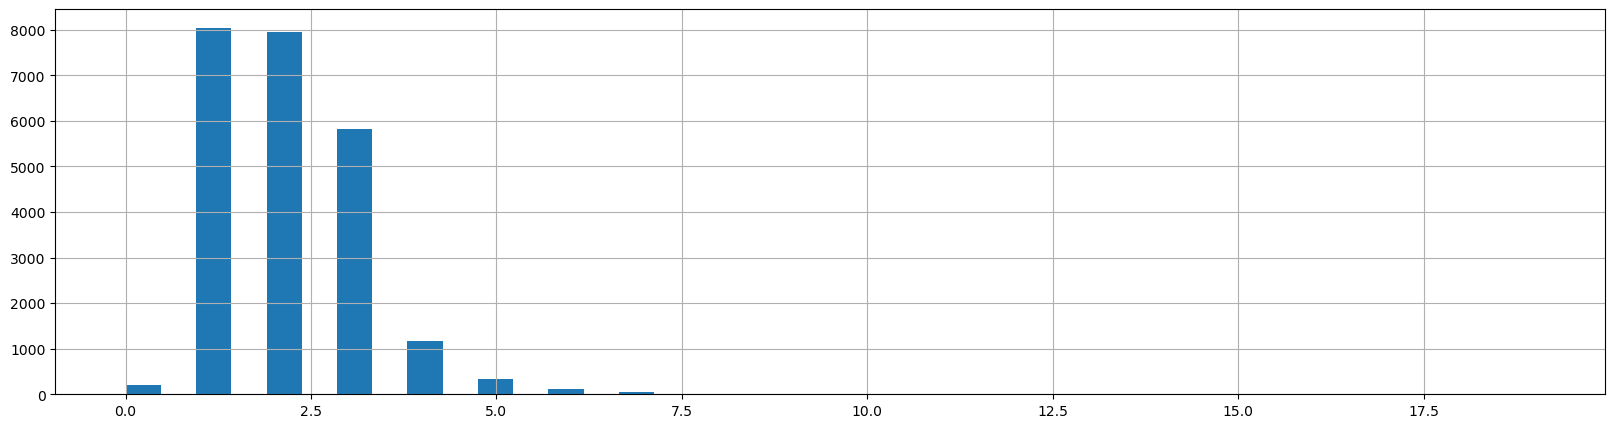

In [47]:
df_check.rooms.hist(bins = 40, figsize = (20,5));

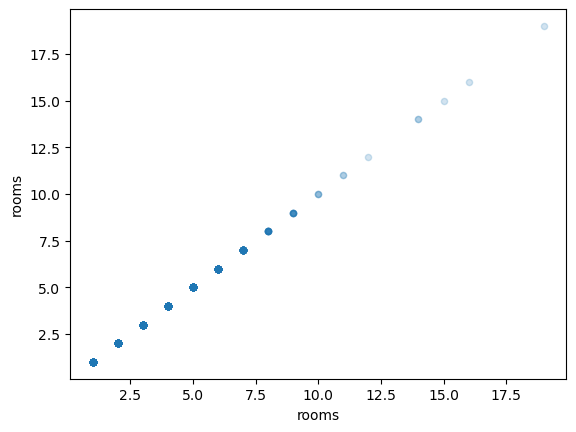

In [48]:
data.plot(x='rooms', y='rooms', kind='scatter', alpha=0.2);

Самую большую массу квартир мы имеем с комнатами в количестве от 1 до 3. Также больший разлет начинается в сторону увеличения количества комнат. Судя по распределеют они как минимум до 12 комнат, квартиры имеют место быть. Но возникают вопросы в разбросе от 15 до 19 комнат. Это вполне может быть уникальным жильем, но при этом также ошибкой, и фактором, который может повлиять на проект в целом. Например квартиры с комнатами от 9 до 14 имеют несколько позиций, что дает понять о допустимости их наличия. Выбросы с 15 до 19 можно удалить.

In [49]:
data.drop(index=data.query('rooms > 14').index,inplace=True)

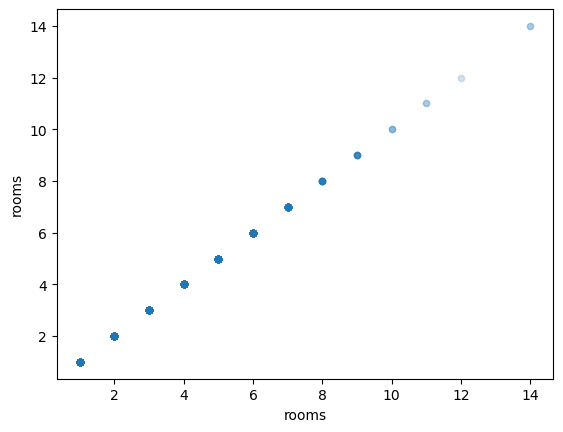

In [50]:
data.plot(x='rooms', y='rooms', kind='scatter', alpha=0.2);

**total_area**

In [51]:
df_check.total_area.value_counts().to_frame()

,total_area
45.00,419
42.00,383
60.00,347
31.00,346
44.00,345
...,...
184.40,1
55.64,1
56.16,1
109.10,1


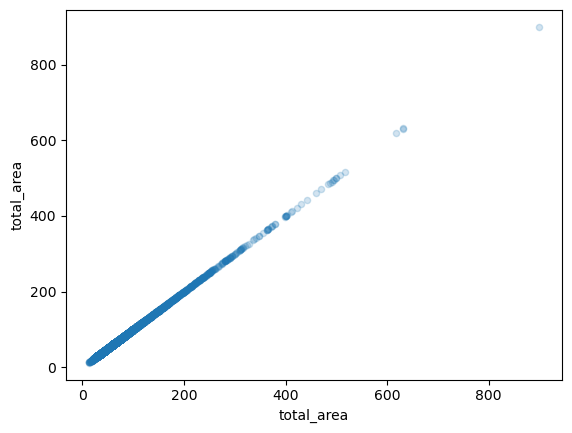

In [52]:
data.plot(x='total_area', y='total_area', kind='scatter', alpha=0.2);

Проверим сколько квартир имеет площадь от 600 и 800 метров:

In [53]:
print('Квартира от 600м:', data.query('total_area > 600 and total_area < 800')['total_area'].count())
print('Квартира от 800м:', data.query('total_area >= 800')['total_area'].count())

Квартира от 600м: 3
Квартира от 800м: 1


Уберем эти выбросы:

In [54]:
data.drop(index=data.query('total_area > 600').index,inplace=True)

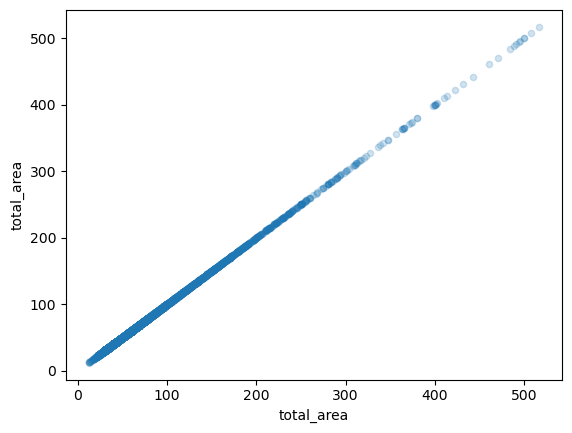

In [55]:
data.plot(x='total_area', y='total_area', kind='scatter', alpha=0.2);

**ceiling_height**

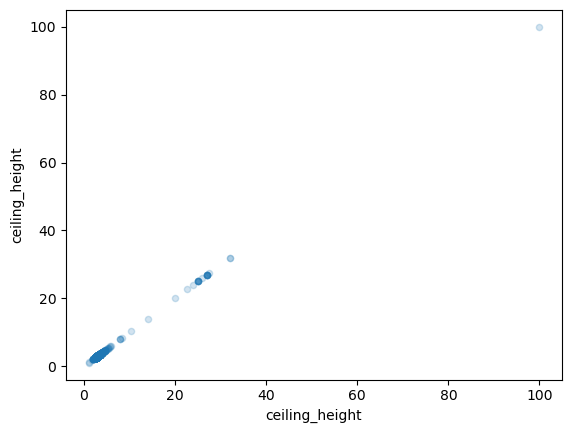

In [56]:
data.plot(x='ceiling_height', y='ceiling_height', kind='scatter', alpha=0.2);

In [57]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Среди уникальных значений высоты потолка мы видим аномальные позиции, которые не могут существовать в принципе, также присутствуют и те где возможна ошибка, или стоит за исключительно уникальным строением. Несмотря на то что в целом преобладает разброс 4-5 метров, стоит проверить количество 8-10 метровых квартир. Все дело в том, что в полследнее время, а точнее с 2015-2016 годов стали популярны квартиры с высокими потолками, в которых устанавливались своего рода фальшивые этажи. 

In [58]:
print('Квартиры высотой 4-5м:', data.query('ceiling_height >= 4 and ceiling_height <=5')['ceiling_height'].count())
print('Квартиры высотой 5-6м:', data.query('ceiling_height >= 5 and ceiling_height <=6')['ceiling_height'].count())
print('Квартиры высотой 6-7м:', data.query('ceiling_height >= 6 and ceiling_height <=7')['ceiling_height'].count())
print('Квартиры высотой 7-8м:', data.query('ceiling_height >= 7 and ceiling_height <=8')['ceiling_height'].count())
print('Квартиры высотой 8-9м:', data.query('ceiling_height >= 8 and ceiling_height <=9')['ceiling_height'].count())
print('Квартиры высотой 9-10м:', data.query('ceiling_height >= 9 and ceiling_height <=10')['ceiling_height'].count())
print('Квартиры высотой 10-11м:', data.query('ceiling_height >= 10 and ceiling_height <=11')['ceiling_height'].count())
print('Квартиры высотой 11-12м:', data.query('ceiling_height >= 11 and ceiling_height <=12')['ceiling_height'].count())



Квартиры высотой 4-5м: 77
Квартиры высотой 5-6м: 8
Квартиры высотой 6-7м: 1
Квартиры высотой 7-8м: 3
Квартиры высотой 8-9м: 4
Квартиры высотой 9-10м: 0
Квартиры высотой 10-11м: 1
Квартиры высотой 11-12м: 0


Можно точно сказать, что квартиры 4-5 метров имеют место быть, что собственно не удивительно, ведь такие высоты существуют. Более 5 метров также имеют место быть. Абсолютный предел который мы можем наблюдать - это 10 метров, после которого мы видим только частный случай, который можно удалить. Что до позиций до 10 метров, не думаю что стоит их убирать как выброс, так как такие помещения возможны, и могут быть дорогим жильем, которые находятся в новых застройках. 

Также стоит обратить внимание на большую конентрацию квартир с высотой от 20 метров:

In [59]:
print('Квартиры высотой 20-30м:', data.query('ceiling_height >= 20 and ceiling_height <=30')['ceiling_height'].count())

Квартиры высотой 20-30м: 20


В совокупности мы види целых 20 позиций, которые имеют разброс от 20-30 метров. Само собой это через чур большая высота для жилого помещения. Можно лишь предположить, что это ошибка, и высоты имеют данные не 20-30 метров, а 2,5-3 метра соотв. Можно исправить их, а остальные спорные позиции удалить как выбросы. 

In [60]:
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 30)]['ceiling_height']/10)

In [61]:
data.drop(index=data.query('ceiling_height > 9').index,inplace=True)

Также стоит удалить позиции, которые присутсвуют в таблице с высотой потолка менее 2.3 метров, так как по снипам такого не может быть, но вполне можно встретить небольшие погрешности. Это может быть связано как с кустовой постройкой здания (применимо к старым), так и неправильных замерах при ремонтах исказающих реальные габариты.

In [62]:
data.drop(index=data.query('ceiling_height < 2.3').index,inplace=True)

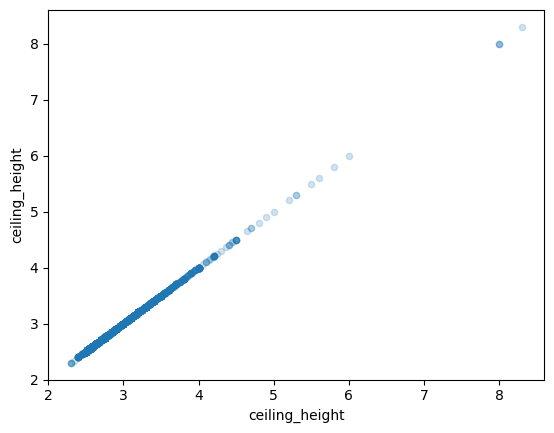

In [63]:
data.plot(x='ceiling_height', y='ceiling_height', kind='scatter', alpha=0.2);

In [64]:
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 ,
       3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 ,
       4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 8.3 , 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 3.51, 3.93, 3.42, 2.99, 3.

**days_exposition**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

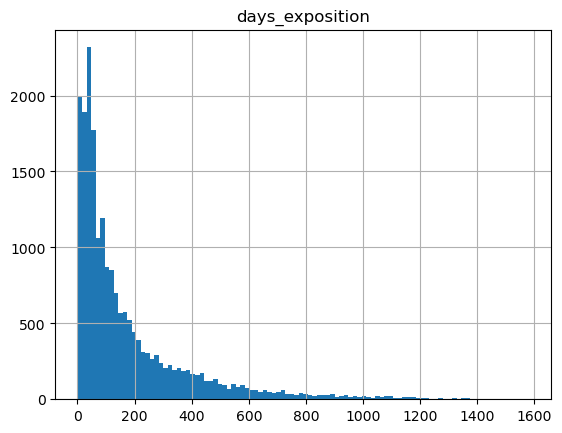

In [65]:
data.hist('days_exposition', bins=100)

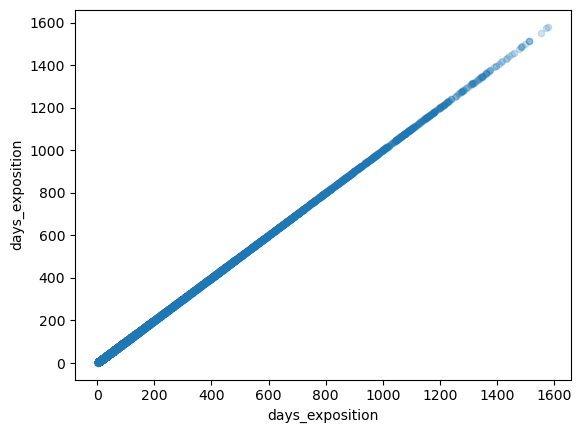

In [66]:
data.plot(x='days_exposition', y='days_exposition', kind='scatter', alpha=0.2);

В принципе тут все четко и вполне очевидно. Никаких странностей не наблюдается. Имеются лишь небольшие выбросы до 1600 дней. Можно было бы их убрать, но они не выглядят особо критично.

**last_price**

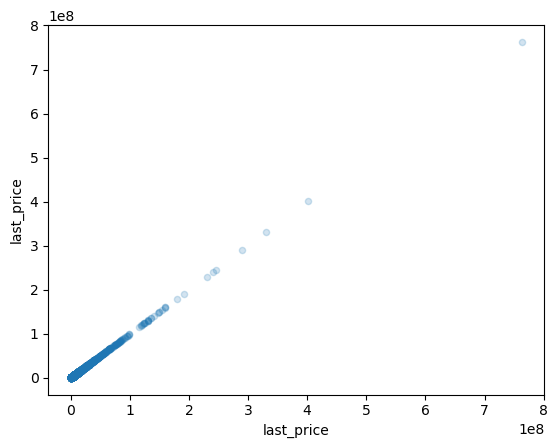

In [67]:
data.plot(x='last_price', y='last_price', kind='scatter', alpha=0.2);

Тут мы видим, что большая масса ценников на жилье около 100 млн. рубле. Далее до 200 млню лежат более редкие позиции, которое возможно принадлежат очень дорогому сегменту. Остальные выбросы слишком сильные и могут быть ошибкой. В любом случае их тоже стоит проверить.

In [68]:
print('Квартиры стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Квартиры стоимостью 100000:', data.query('last_price <= 100000')['last_price'].count())
print('Квартиры стоимостью 400к - 500к:', data.query('last_price >= 400000 and last_price <=500000')['last_price'].count())
print('Квартиры стоимостью 300000000 - 800000000:', data.query('last_price >= 300000000 and last_price <=800000000')['last_price'].count())

Квартиры стоимостью 0: 0
Квартиры стоимостью 100000: 1
Квартиры стоимостью 400к - 500к: 17
Квартиры стоимостью 300000000 - 800000000: 3


Можно сделать выводы что квартиры с нулевой стоимостью отсутствуют, имеет одну позицию менее 100к (скорее всего вышеупомянутая за 12к), несколько сверх дорогих и пару аномально дорогих.  

In [69]:
data.drop(index=data.query('last_price < 100000').index,inplace=True)

In [70]:
data.drop(index=data.query('last_price > 300000000').index,inplace=True)

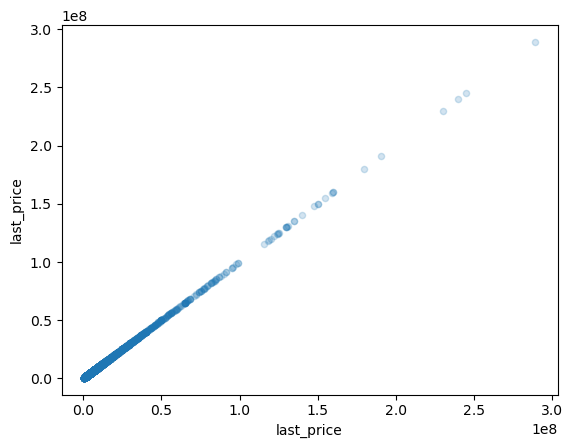

In [71]:
data.plot(x='last_price', y='last_price', kind='scatter', alpha=0.2);

**living_area**

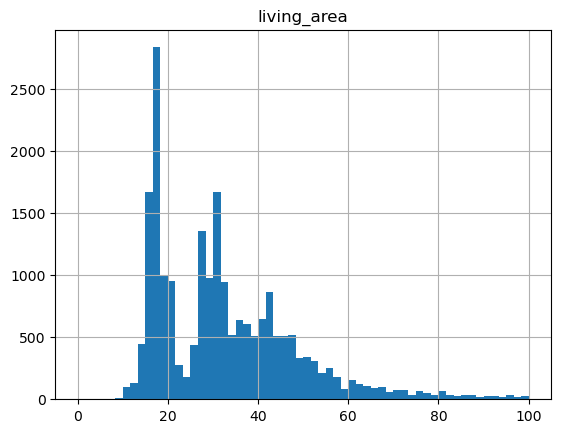

In [72]:
data.hist('living_area', bins=60, range=(0,100));

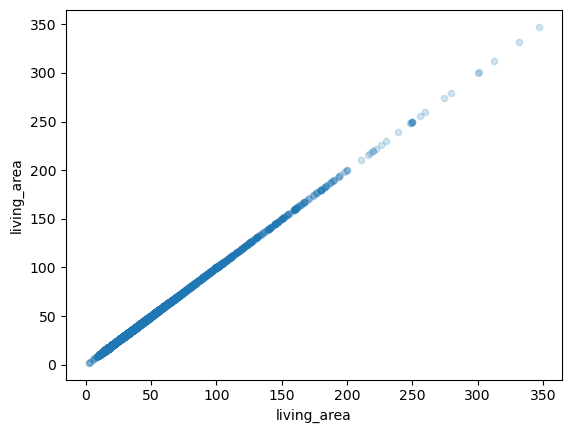

In [73]:
data.plot(x='living_area', y='living_area', kind='scatter', alpha=0.2);

Мы видим два пика на гистограмме в 17-18 метров и 30 метров жилого пространства. Можно сделать вывод что именно эти квартиры являются доминирующей частью всей таблицы. Но также мы видим небольшое количество квартир с совсем минимальными размерами жилой площади, около 10м. Возможно под ними лежат однушки. Но также мы помним что имеем еще меньшие размеры, что скорее всего является ошибкой. 
Также есть небольшие выбросы и среди самых больших площадей. Наш максимум по таблице - это около 400м. 

In [74]:
print('Жилая площадь меньше 10 кв.м.: ', data.query('living_area < 10')['living_area'].count())

Жилая площадь меньше 10 кв.м.:  25


In [75]:
print('Жилая площадь больше 300 кв.м.: ', data.query('living_area > 300')['living_area'].count())

Жилая площадь больше 300 кв.м.:  4


In [76]:
data.drop(index=data.query('living_area < 10').index,inplace=True)

In [77]:
data.drop(index=data.query('living_area > 350').index,inplace=True)

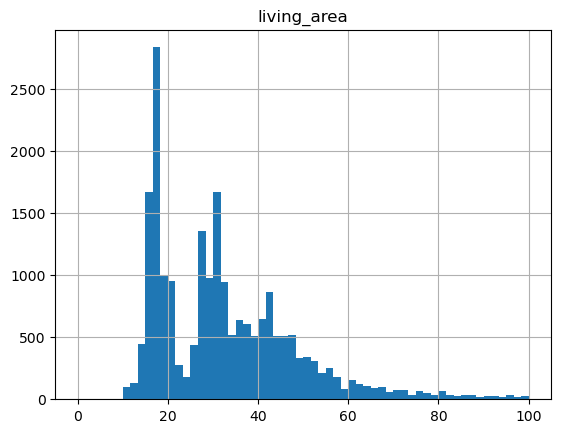

In [78]:
data.hist('living_area', bins=60, range=(0,100));

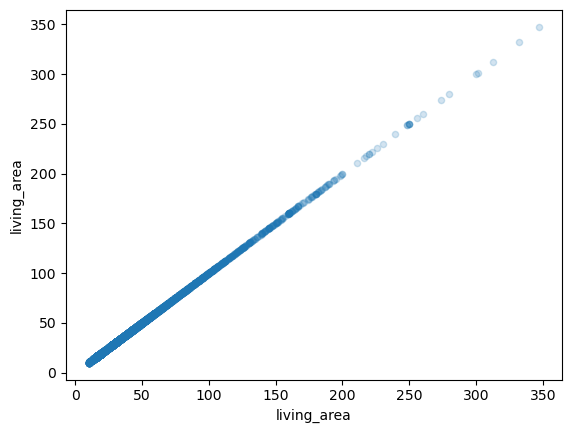

In [79]:
data.plot(x='living_area', y='living_area', kind='scatter', alpha=0.2);

**kitchen_area**

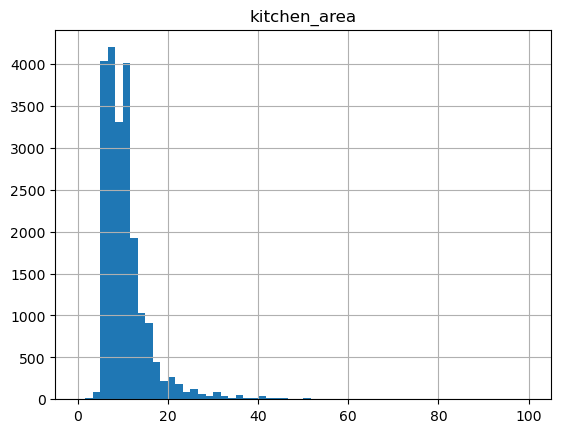

In [80]:
data.hist('kitchen_area', bins=60, range=(0,100));

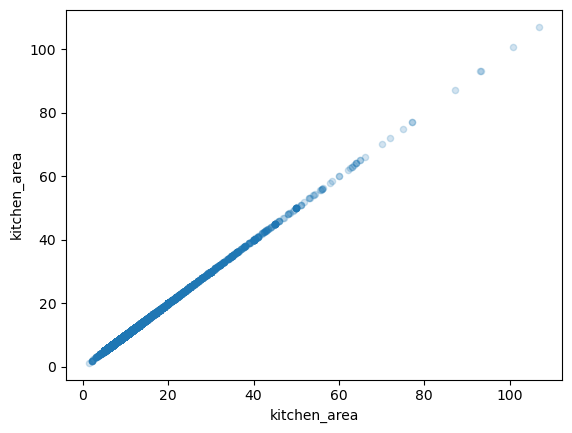

In [81]:
data.plot(x='kitchen_area', y='kitchen_area', kind='scatter', alpha=0.2);

In [82]:
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше 100 кв.м.: ',data.query('kitchen_area > 100')['living_area'].count())

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни 5 кв.м.:  352
Площадь кухни больше 50 кв.м.:  41
Площадь кухни больше 100 кв.м.:  2


Можно сделать вывод, что кухни в основном начинаются с 5 метров, что возможно. Одна позиция с метражем в 2 метра скорее всего ошибка. Также мы видим что после 50м число позиций сокращается, но тем не менее данный метражи имеют место, так как возможны. Есть примеры когда кухня бывает и 100м.

In [83]:
data.drop(index=data.query('kitchen_area < 5').index,inplace=True)

**floors_total**

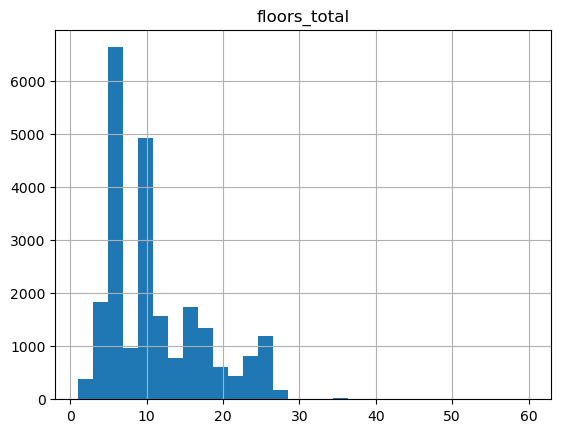

In [84]:
data.hist('floors_total', bins=30);

На самом деле, с этажами не видно никаких странных значений. Нулевых этажей быть не может, а квартир на первом этаже вполне себе. Также нет ничего удивительного в высоте здания за 30 этажей. Такие новостройки давно уже не новинка. Но так как мы видим малое количество подобных позиций, уберем этот излишек.

In [85]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,486.00","23,486.00","23,486.00","20,331.00","23,486.00","21,592.00","21,224.00","23,486.00","23,402.00"
min,1.00,12.00,2.30,1.00,"430,000.00",10.00,5.00,1.00,1.00
max,14.00,517.00,8.30,"1,580.00","289,238,400.00",347.50,107.00,33.00,60.00


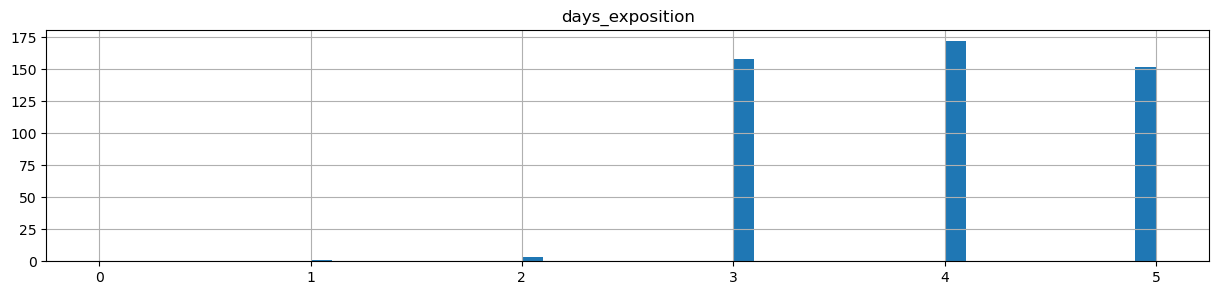

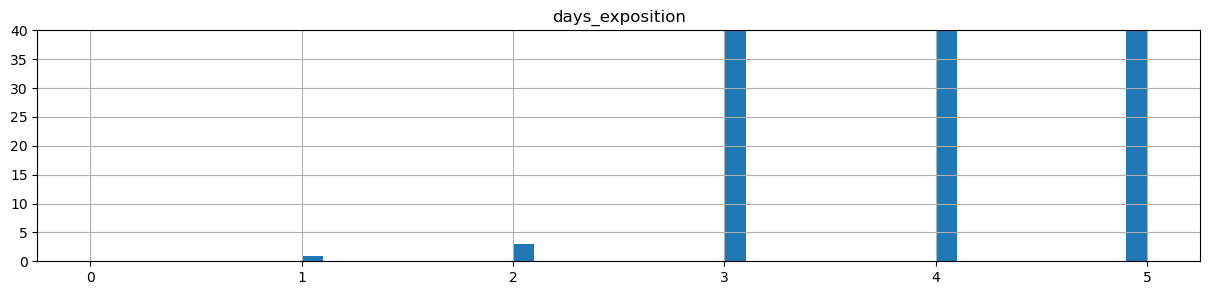

In [86]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [87]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,1.00,20.02,2.45,3.00,"567,730.00",10.00,5.00,1.00,2.00
0.010000,1.00,25.79,2.50,4.00,"1,000,000.00",13.10,5.00,1.00,2.00
0.500000,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.20,4.00,9.00
0.990000,5.00,196.00,3.59,"1,068.40","35,329,850.00",118.54,35.00,23.00,26.00
0.998800,7.00,364.57,4.39,"1,371.02","117,543,180.00",199.09,56.11,26.00,34.92


### Посчитайте и добавьте в таблицу новые столбцы

**1** Посчитаем цену квадратного метра:

In [88]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [89]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другой,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,поселок шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81.0,первый,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другой,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другой,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другой,100000.00


**2** Добавим в таблицу день, месяц, год публикации:

In [90]:
data['day'] = data['first_day_exposition'].dt.weekday

In [91]:
data['month'] = data['first_day_exposition'].dt.month

In [92]:
data['year'] = data['first_day_exposition'].dt.year

In [93]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,price_per_meter,day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,другой,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,455.0,0.0,502.0,81.0,первый,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,другой,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,другой,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,другой,100000.00,1,6,2018


**3** Добавим в таблицу тип этажа квартиры:

In [94]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,price_per_meter,day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,другой,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,455.0,0.0,502.0,81.0,первый,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,другой,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,другой,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,другой,100000.00,1,6,2018


In [95]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

**4** Добавим расстояние до центра города:

In [96]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round(decimals=2)

In [97]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,price_per_meter,day,month,year,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,другой,120370.37,3,3,2019,16.03
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,455.0,0.0,502.0,81.0,первый,82920.79,1,12,2018,18.60
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,другой,92785.71,3,8,2015,13.93
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,другой,408176.10,4,7,2015,6.80
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,другой,100000.00,1,6,2018,8.10


**5** Построим гистограммы для каждого параметра таблицы:

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

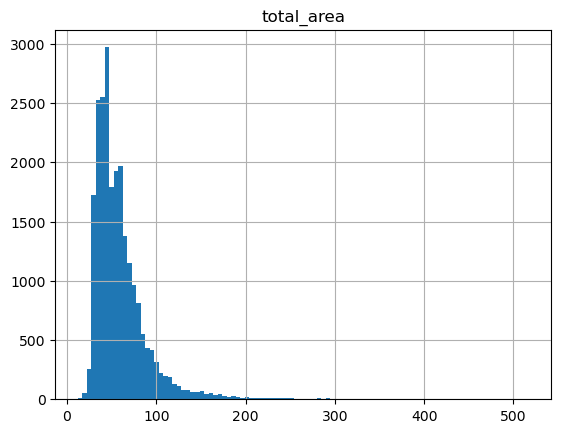

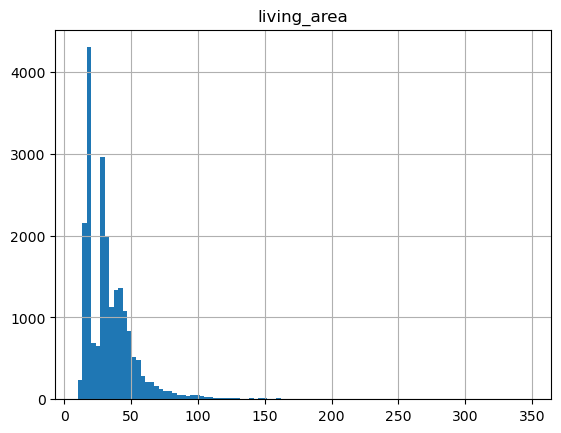

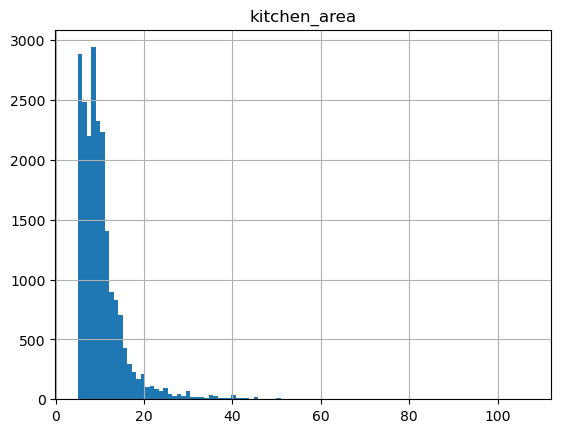

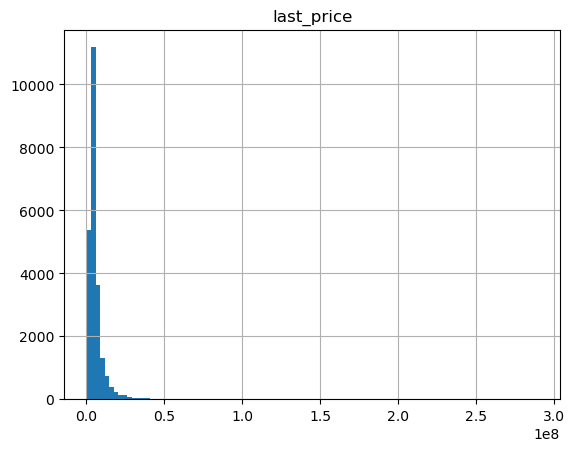

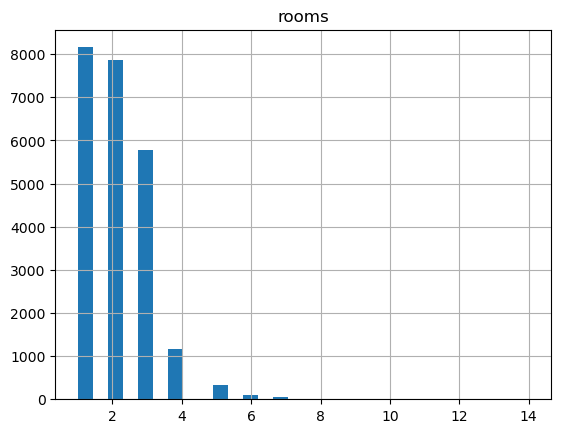

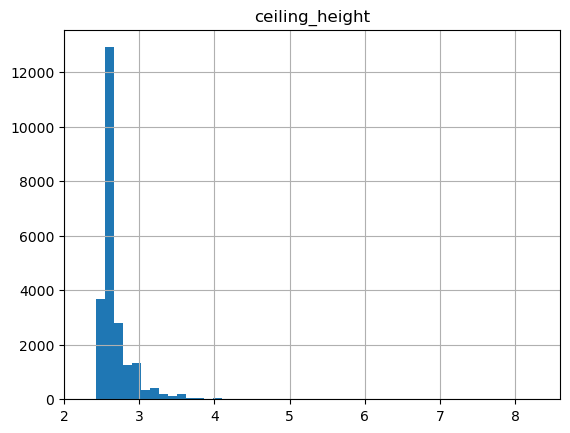

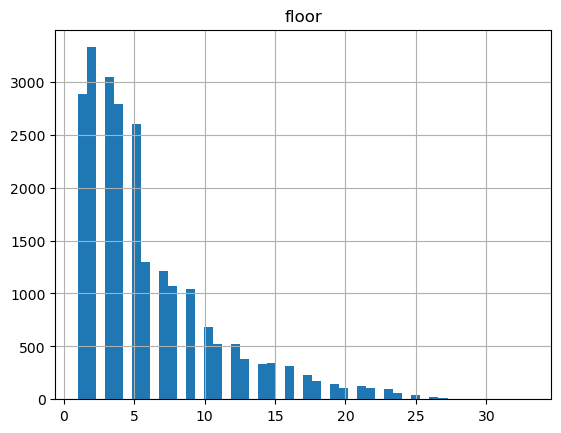

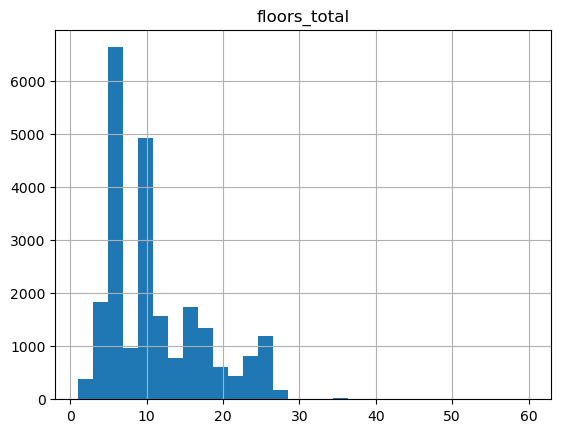

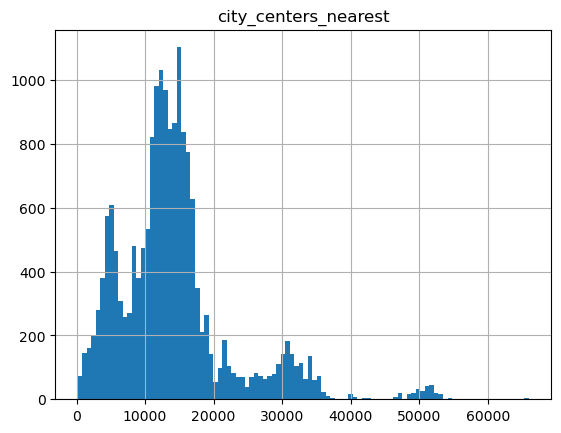

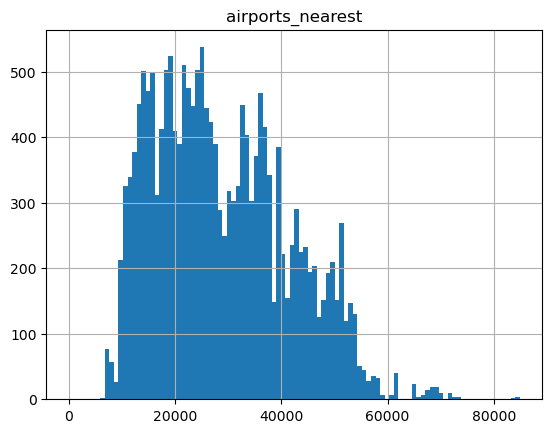

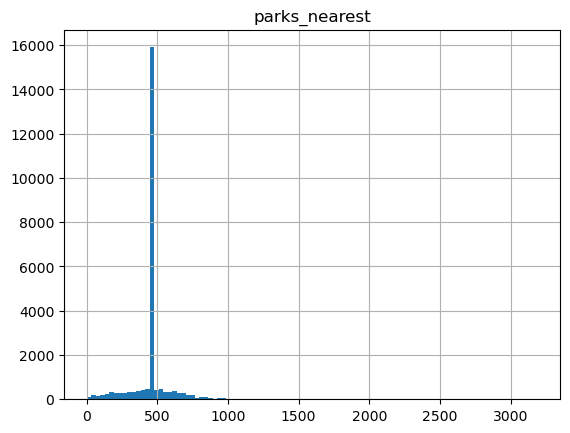

In [98]:
data.hist('total_area', bins=100)

data.hist('living_area', bins=100)

data.hist('kitchen_area', bins=100)

data.hist('last_price', bins=100)

data.hist('rooms', bins=30)

data.hist('ceiling_height', bins=50)

data.hist('floor', bins=50)

data.hist('floors_total', bins=30)



data.hist('city_centers_nearest', bins=100)

data.hist('airports_nearest', bins=100)

data.hist('parks_nearest', bins=100)


<AxesSubplot:xlabel='floor_category', ylabel='count'>

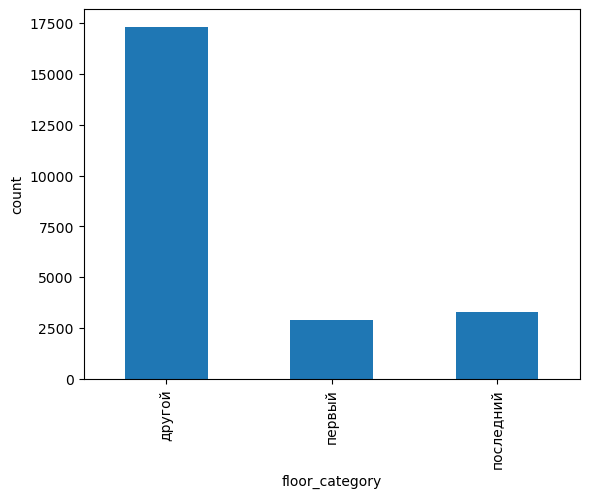

In [99]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count')

In [100]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

array([[<AxesSubplot:title={'center':'day'}>]], dtype=object)

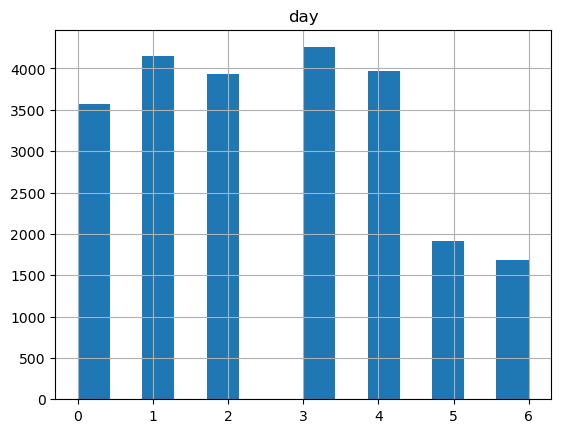

In [101]:
data.hist('day', bins=14)

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

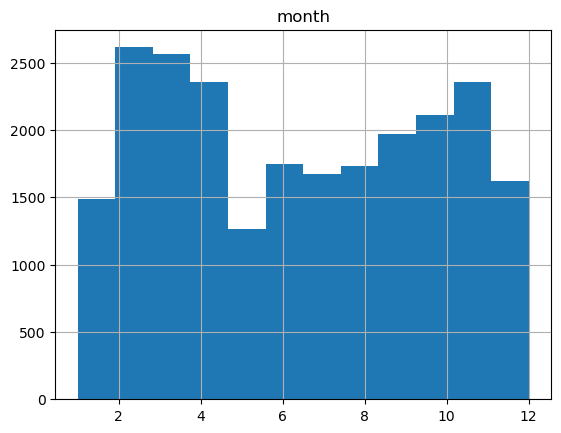

In [102]:
data.hist('month', bins=12)

**6** Как быстро продавались квартиры?

Среднее время продажи: 180
Медианное время продажи: 95


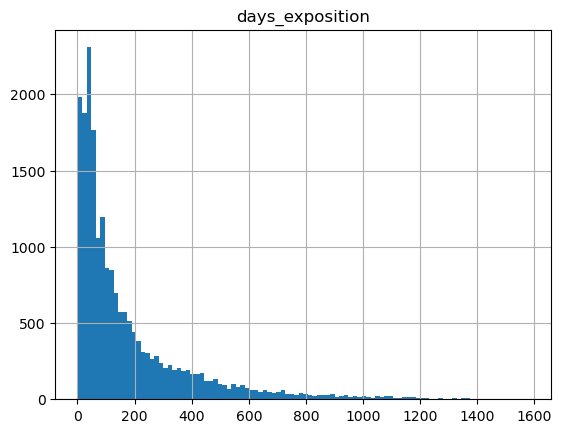

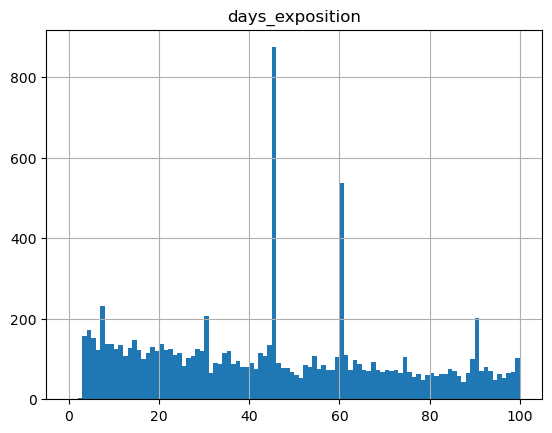

In [103]:
data.hist('days_exposition', bins=100);
data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи:',int(data['days_exposition'].mean()))
print('Медианное время продажи:',int(data['days_exposition'].median()))

Судя по полученным данным, среднее время продажи квартиры составляет 180 дней. Медиана же составляет около 95 дней. По графикам можно сказать, что очень много квартир продавались достаточно долгое время. В идеале лучшее время для продажи квартиры - это до 95 дней, но с допуском до среднего числа.


**7** Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Факторы, которые мы рассмотрим:
- общая площадь (total_area);
- жилая площадь (living_area);
- площадь кухни (kitchen_area);
- количество комнат (rooms);
- тип этажа, на котором расположена квартира (первый, последний, другой) (floor_category);
- даты размещения (день недели, месяц, год) (first_day_exposition).

<AxesSubplot:xlabel='last_price', ylabel='first_day_exposition'>

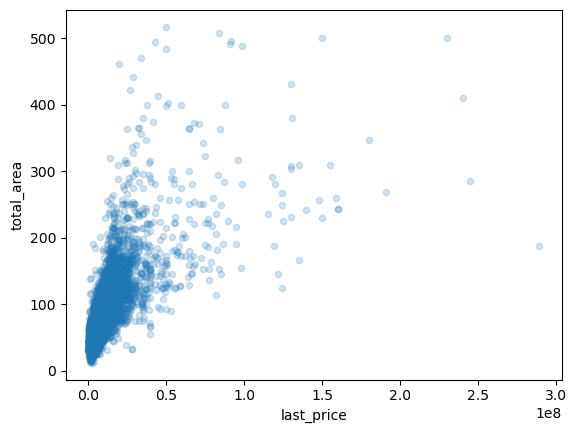

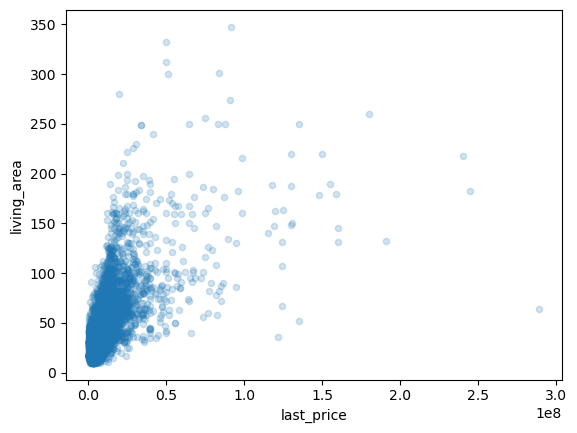

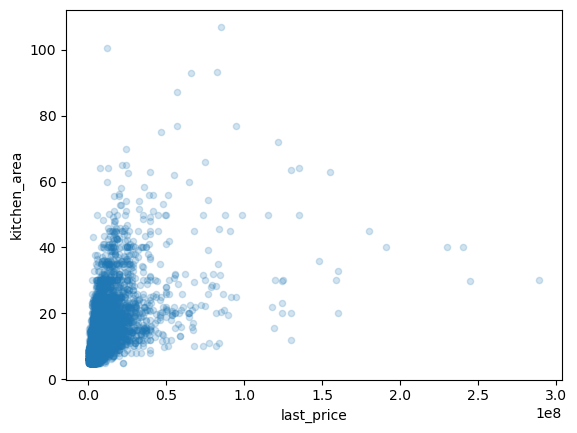

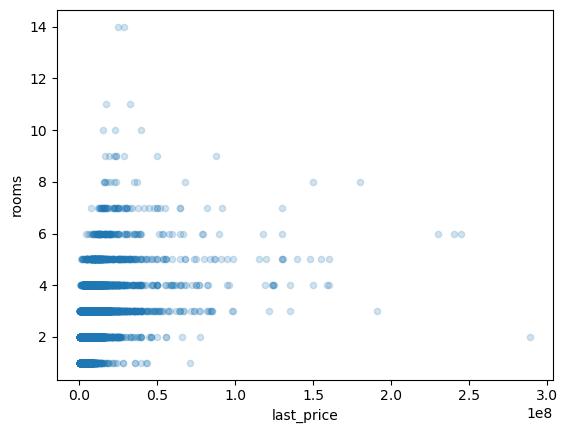

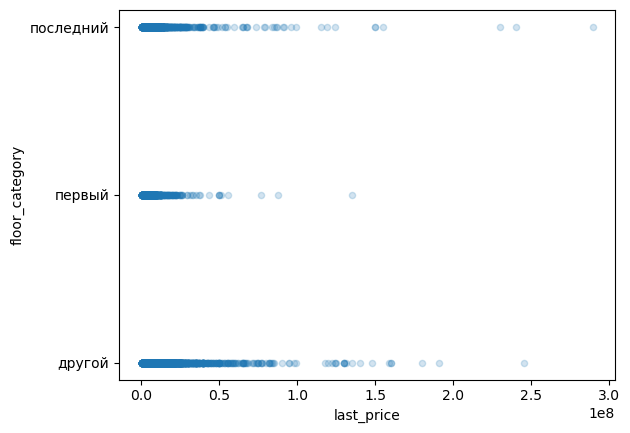

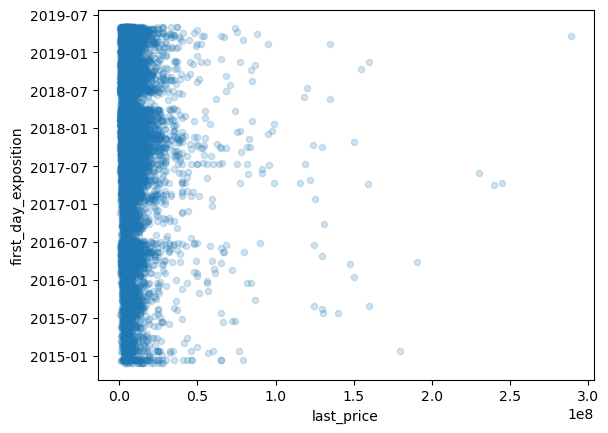

In [104]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='first_day_exposition', kind='scatter', alpha=0.2)

- total_area - По графику мы видим прямую зависимость стоимости жилплощади исходя из ее площади. В основном мы видим скопление до 200 метров, и редкие выбросы с более большей площадью и ценой.
- living_area - Вышесказанный итог справедлив и для жилой площади соответственно. Однако стоит заметить, что в данной интерпритации мы можем наблюдать повышение цен за одно и тоже количество метров. Можно предположить что это более лучшие условия, которые оцениваются дороже.
- kitchen_area - Как и жилая зона, кухня также влияет на стоимость помещенияч в целом, но в данном случае, мы можем наблюдать некоторый спад, и большую стабильность стоимости относительно общей площади. Можно сказать, что кухонная площадь, какая бы она не была, имеет меньший вес в стоимости, но пренебрегать ей полностью глупо.
- rooms - Исходя из графика, нам также очевидно, что количество комнат однозначно влияет на общий прайс. Также присутсвтуют радикальные выбросы, которые указывают на чрезмерную стоимость помещения, и его размеры. Они очень редки, но тем не менее они вполне могут олицетворять в себе просто дорогое жилье.
- floor_category - Тут все очевидно. Квартиры на первом этаже продаются по более низкой цене, что собственно никого не удивит. 
- first_day_exposition - Судя по полученным данным, стоимость держится примерно на одном уровне, но постепенно повышается из года в год. Причиной может быть инфляция, возраст здания и другие подобные факторы. Мы можем наблюдать, как какждый год цена систематично падает, но потом вновь возвращается на свой уровень. 

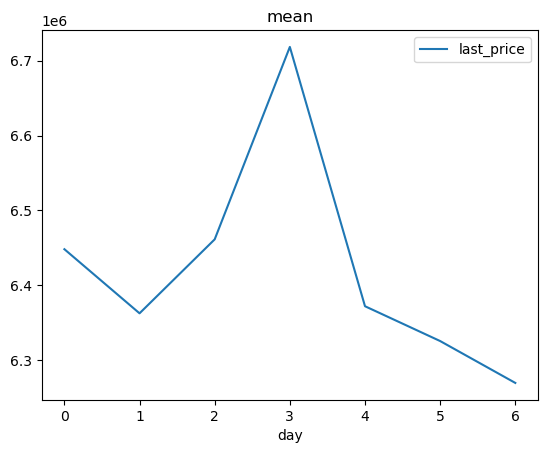

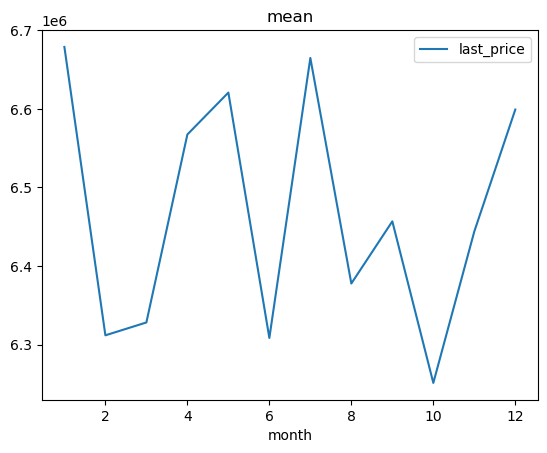

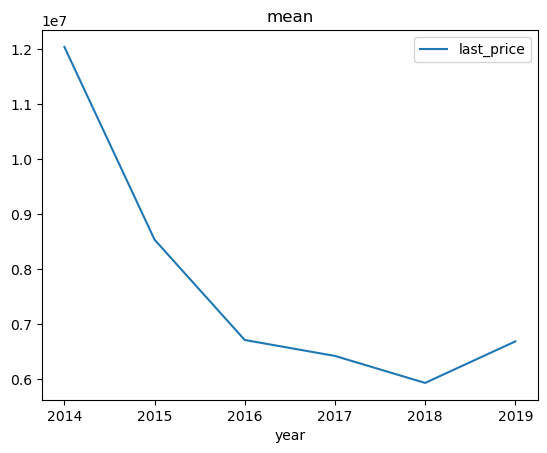

In [105]:
data.pivot_table(index='day',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');

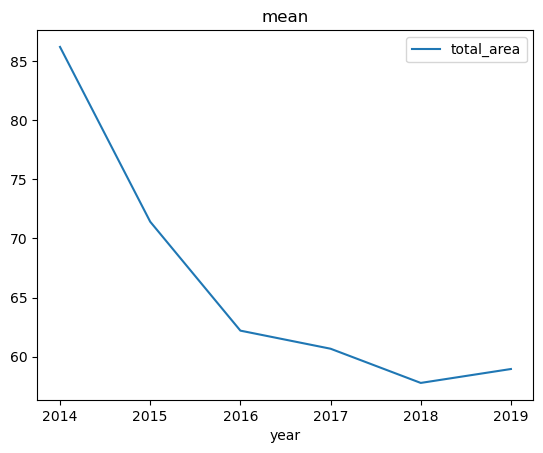

In [106]:
data.pivot_table(index='year',values='total_area',aggfunc='mean').plot(y='total_area', kind='line', title='mean');

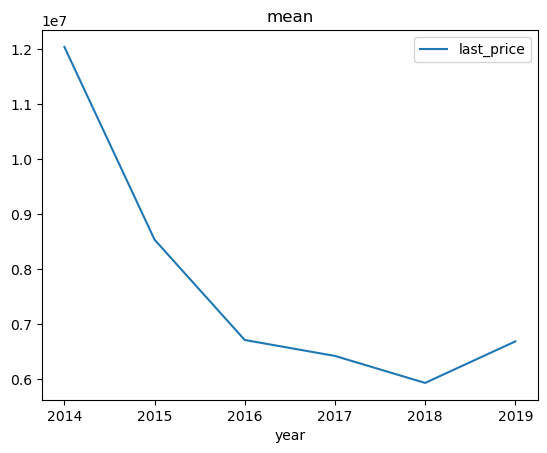

In [107]:
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');

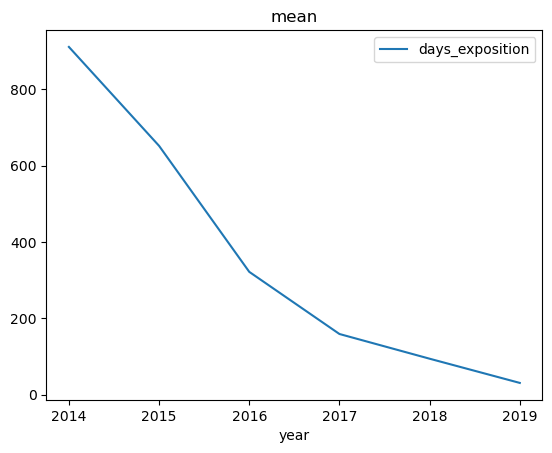

In [108]:
data.pivot_table(index='year',values='days_exposition',aggfunc='mean').plot(y='days_exposition', kind='line', title='mean');

- По площадям - по графику можно сделать вывод, что спустя годы, предложения с квартирами с большим количеством квадратных метро стал падать, будто заканчиваясь. Но после 2018 года, оно вновь стало расти, но особо сильно. Можно предположить что это люди, которые решили продать свою недвижимость и переехать в другое место. 
- По ценам - в целом он почти соответсвует графику что находится выше. Возможно тут есть связь с количеством продаж и ценой. Вполне может оказаться так, что падение предложения, оставило на рынке большую часть более дешевых вариантов, на которые общая стоимость была меньше, чем на более большие квартиры. Возможно рост предложения после 2018 года, немного подтянул общий уровень цены на рынке.
- По позициям - на графике мы можем наблюдать как общее количество предложений сокращается к 2019 году. Полагаю это также связано с падением предложения.

**8** Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

<AxesSubplot:ylabel='locality_name'>

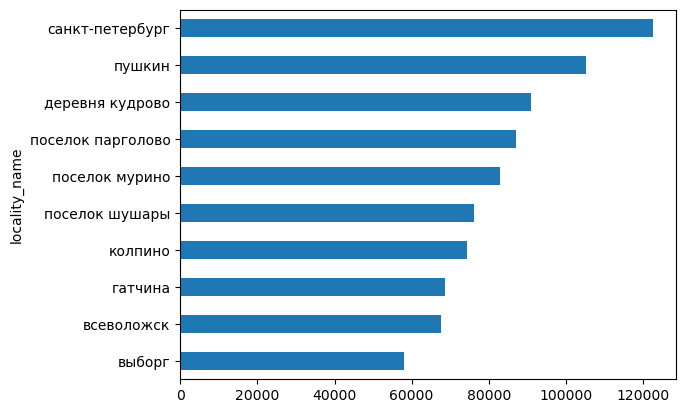

In [109]:
price_square_meter = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
price_square_meter.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
price_square_meter.pop('total_area_count')
price_square_meter.sort_values(by=['last_price_count'],ascending=False, inplace=True)
price_square_meter = price_square_meter.iloc[:10]
price_square_meter['price_per_sq_m'] = price_square_meter['last_price_sum']/price_square_meter['total_area_sum']
price_square_meter.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
price_square_meter['price_per_sq_m'].plot(kind='barh')

**9** Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:ylabel='Frequency'>

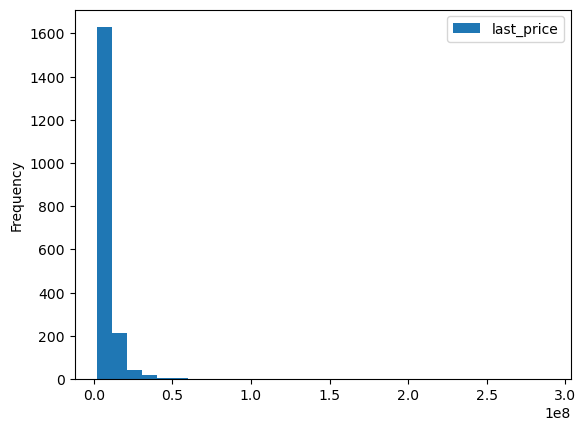

In [110]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='hist', bins=30)
)


<AxesSubplot:title={'center':'mean'}, xlabel='city_centers_nearest_km'>

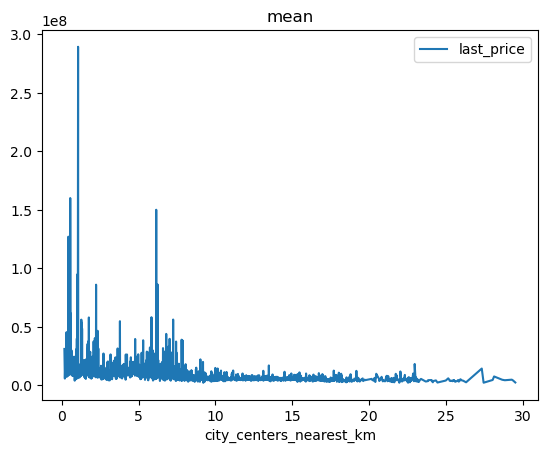

In [111]:
data[data['locality_name']=='санкт-петербург'].pivot_table(index='city_centers_nearest_km',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean')

In [112]:
# check
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].apply(np.ceil)

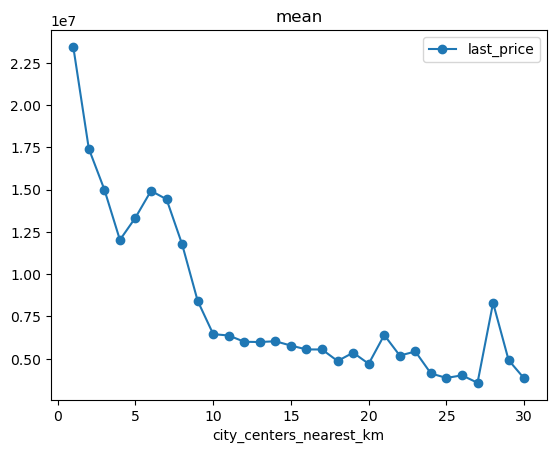

In [113]:
# check
(
    data[data['locality_name']=='санкт-петербург']
        .pivot_table(index='city_centers_nearest_km',values='last_price',aggfunc='mean')
        .plot(y='last_price', kind='line', title='mean', style = 'o-')
);

In [114]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].apply(np.ceil)
data[(data['locality_name'] =='санкт-петербург') & (data['city_centers_nearest_km'] == 27)]  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,price_per_meter,day,month,year,city_centers_nearest_km
7732,20,3975000.0,74.0,2018-08-20,3,3.20,3.0,43.8,2,True,...,455.0,1.0,498.0,112.0,другой,53716.22,0,8,2018,27.0
14146,18,4150000.0,36.0,2018-09-05,1,2.50,10.0,20.0,7,True,...,455.0,0.0,502.0,45.0,другой,115277.78,2,9,2018,27.0
18378,9,2600000.0,46.0,2017-11-10,1,2.65,2.0,20.0,1,True,...,455.0,0.0,502.0,29.0,первый,56521.74,4,11,2017,27.0


На 27 километре мы видим 3 достаточно дорогие позиции. Чисто по данным квартиры достаточно скромные, что наводит мысль об ошибке. Но также возможен вариант того, что данные квартиры расположены в дорогих зданиях, что по идее реалистично. 

In [115]:
# check
data[(data['locality_name'] =='санкт-петербург') & (data['city_centers_nearest_km'] == 28)]  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,floor_category,price_per_meter,day,month,year,city_centers_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,True,...,1496.0,0.0,502.0,128.0,другой,193918.92,1,11,2017,28.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,True,...,455.0,0.0,502.0,178.0,последний,70312.50,1,2,2018,28.0


(0.0, 700.0)

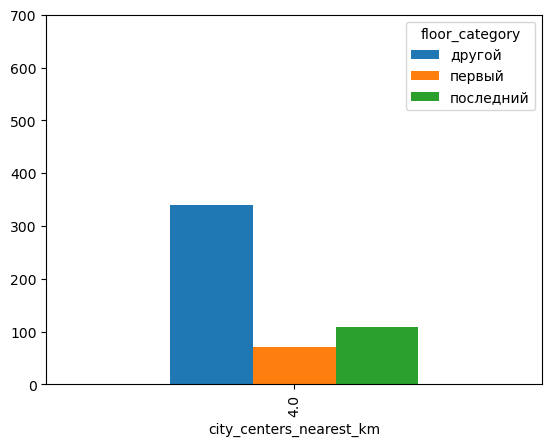

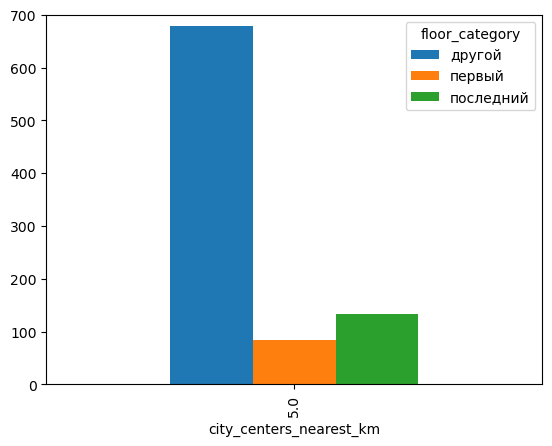

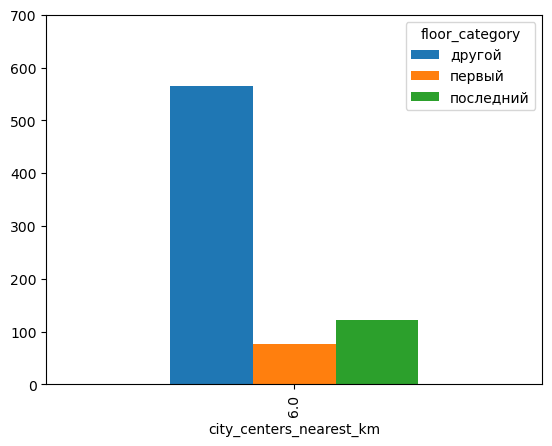

In [116]:
(
    data[data['city_centers_nearest_km'] == 4]
         .pivot_table(index='city_centers_nearest_km', columns='floor_category', values='last_price', aggfunc='count')
         .plot(kind='bar')
    
)
plt.ylim(0, 700)

(
    data[data['city_centers_nearest_km'] == 5]
         .pivot_table(index='city_centers_nearest_km', columns='floor_category', values='last_price', aggfunc='count')
         .plot(kind='bar')
)
plt.ylim(0, 700)

(
    data[data['city_centers_nearest_km'] == 6]
         .pivot_table(index='city_centers_nearest_km', columns='floor_category', values='last_price', aggfunc='count')
         .plot(kind='bar')
)
plt.ylim(0, 700)

### Общий вывод:

После получения данных, мы их проанализировали, очистили от мусора и где это возможно дополнили значениями. Что в итоге мы смогли получить из этого анализа:

- На стоимость жилплощади сильно влияют не только само количество квадратных метров, но и местоположение. 
- Самые дорогии позиции находяся В Питере и окружающих их крупных городах: Пушкин, Гатчина, Всеволожск, Выборг и нескольких небольших поселениях.
- В общей массе большая часть дорогих позиции находится от 1 до 20 км от центра. Можно наблюдать повторяющиеся скачки, которые могут означать особо дорогое жилье, но в основном уровень цен примерно одинаков, и снижается ч ростом расстояния.
- Самые быстрые продажи - это примерно 95 суток. В идеале позиция должна находится в этом временном промежутке. Приемлемая - от 95 до 180, а самые затянувшиеся свыше 180. 
- На 27 км наблюдается выброс, но как уже было сказано выше - это могут быть частные случаи, особенно учитывая их малое количество.
- В целом мы видим, что цены упали, в сравнении с прошлыми годами, но лишь недавно начали расти вновь.
- На расстоянии 3-5 км вы видим падение цены в следствии ценообразования на квартиры определенных этажей.
- Так же мы видим, что с 2014 года до 2018 наблюдается снижение цен, на фоне снижения предложения на крупные квартиры метражем от 40-60 и более метров. Общий средний показатель цены снижается, так как остаются более дешевые варианты, которые соответсвенно стоят меньше, чем крупная недвижимость. 